# Complexity in Return Predictions for Asset Management Using Dense Neural Networks and Keras API

---


This project explores the application of deep learning techniques, specifically Dense Neural Networks (DNNs) using the Keras API, to predict asset returns in the field of asset management. The goal is to investigate the complexity of return prediction models and how advanced neural network architectures can capture non-linear relationships in financial data.

This work is motivated by the increasing importance of quantitative methods in finance and the potential for deep learning to improve predictive accuracy beyond traditional linear models.

## Motivation
Predicting asset returns is a crucial task in asset management for making informed investment decisions, managing risk, and constructing optimal portfolios. While traditional statistical models and linear factor models have been used for decades, financial markets are complex and exhibit non-linear dynamics that may not be fully captured by these simpler approaches.

## Project Objective
The primary objective of this project is to demonstrate how Dense Neural Networks can be built and applied to the problem of predicting monthly stock market returns using a set of widely recognized predictor variables. We will explore the process of loading and preparing financial data, building and training a DNN model using Keras, and evaluating its performance. Additionally, we will delve into understanding the role of model complexity and the information captured by different layers within the neural network.

In [ ]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import cvxpy as cp

tf.keras.utils.set_random_seed(42)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/My Drive/DS Portfolio/data'

## Why Predicting Returns Matters
Anticipating stock market returns, particularly the S&P 500 (SPX), plays a vital role in decision-making across both financial and non-financial sectors. While portfolio managers and financial institutions rely on these forecasts for capital budgeting and risk management, their influence extends much further.

* Strategic Finance: Companies use market return forecasts to guide mergers, acquisitions, and divestment decisions.
* Retial & E-Commerce: Market expectations inform demand forecasting, inventory management, and dynamic price strategies.
* Manufacturing & Supply Chains: Production planning and distributions are aligned with anticipated economic conditions.
* Other Industries:
  * Real estate uses return forecasts to assess investment timing.
  * Insurance companies leverage them for risk modeling
  * Healthcare organizations use them to guide R&D investments.

So, predicting returns is not just about beating the market. It provides a quantitative foundation for strategic and operational choices across diverse industries, making it a core component of modern business analytics.

---






## How Return Prediction Shapes Asset Management
Asset managers act as intermediaries, directing clients' funds into securities and charginge fees, typically as a percentage of **assets under management (AUM)**. Their business model revolves around offering investment products such as mutual funds, ETFs, retirement portfolios, and hedge funds, while also relying on custody, compliance, and technology services.

The industry evolves with shifting client demand (active vs. passive strategeis), new product vehicles, and innovations like robo-advising. Private equity, venture capital, and angel investors add another dimension, supplying capital in exchange for ownership.

At its core, growth depends on one KPI: **AUM**. To expand it, asset managers must deliver strong performance and competitive products, making **accurate return prediction**.

---

## Using Factors to Model Returns

Analysts have long used **factors** to explain and predict stock returns. Factors capture systematic risk, while the residual represents idiosyncratic risk.  

We assume returns follow the structure:

$$
r_i = \alpha_i + \sum_{k=1}^{p} \beta_{i,k} F_k + \varepsilon_i
$$

- $F_k$: common random factors  
- $\beta_{i,k}$: factor loadings (sensitivities)  
- $\varepsilon_i$: idiosyncratic component  

This lets us express the expected future return at time $t$ as:

$$
\mathbb{E}_t \Big[ r_{i,t+1} \mid (F_1, \dots, F_p) \Big] = f(F_1, \dots, F_p; \beta_i)
$$

---

## From Regression to Deep Learning

The factor model is equivalent to a **linear regression** (or a single-layer perceptron).  
With observable or estimated factors (e.g., via PCA), it becomes a **multivariate linear model**:

$$
r_i = a_i + b_i^T \widehat{F} + \varepsilon_i
   = a_i + \sum_{k=1}^p b_{i,k}\,\widehat{F_k} + \varepsilon_i
$$

At the sample level (for variable $i$ at time $t$):

$$
r_{t,i} = a_{t,i} + b_{t,i}^T \widehat{F_t} + \varepsilon_{t,i}
        = a_{t,i} + \sum_{k=1}^p b_{t,i,k}\,\widehat{F_{t,k}} + \varepsilon_{t,i}
$$

This means:  
- For each variable we have a **multiple regression** (many factors → one response).  
- Across all variables, it becomes a **multivariate regression** (many factors → many responses).  
---

## Implementation Considerations

- Data arrives sequentially → estimation must be done on a **rolling, walk-forward basis**.  
- Using the highest feasible sampling frequency (e.g., trade & quote data) introduces **unevenly spaced time series**.  
- **Deep learning** generalizes this framework by replacing the linear mapping with non-linear architectures that capture richer time-series dependencies.
---

## Nonlinear and High-Dimensional Modeling in Return Prediction

On a given day $t$, assume we can observe $T$ historical days and $p$ variables $(F_1, \dots, F_p)$.  
The modeling challenge depends on the relationship between $p$ and $T$:  

- If $p \leq T$: weights $\widehat{w}$ are uniquely determined.  
- If $p > T$: there are infinitely many solutions. Neural networks address this by introducing nonlinear transformations and implicit regularization.  

Modern theory connects this to **benign overfitting**, **double descent**, and the **virtue of complexity** (see [paper 1](https://onlinelibrary.wiley.com/doi/10.1111/jofi.13298), [paper 2](https://arxiv.org/pdf/2305.19377.pdf)).  

We can then estimate expected future returns at time $t$ as a deep neural network:  

$$
\mathbb{E}_t \big[r_{i,t+1} \mid (F_1, \dots, F_p)\big]
= f(F_1, \dots, F_p; w_i)
= \sigma_{L}\!\Big(W_L \, \sigma_{L-1}(W_{L-1}\, \cdots \sigma_1(W_1 \mathbf{F}))\Big)
$$

For regression targets, the final activation is linear:  

$$
\sigma_L(h) = h
$$

---

## Understanding Factors

- In traditional finance, factors are portfolios built on security characteristics.  
- Here, a factor refers to **any variable with predictive power**.  

Factors often stem from:  
- **Risk premiums**: equity, bond, credit, momentum, volatility, value, carry, growth, inflation, illiquidity, tail-risk, etc.  
- **Behavioral biases**: repeated distortions in prices due to market participant behavior.  

For further reading:  
- *Expected Returns* by Antti Ilmanen ([link](https://www.google.com/books/edition/Expected_Returns/WqFf6imwTsUC?hl=en&gbpv=1&printsec=frontcover))  
- BlackRock’s [factor investing resources](https://www.blackrock.com/us/financial-professionals/products/factor-etfs) and commentary by [Andrew Ang](https://www.blackrock.com/us/individual/investment-ideas/what-is-factor-investing/factor-commentary/andrews-angle).  

---

## Implementation Considerations

- High-dimensional prediction models are necessary to manage portfolios effectively.  
- Deep neural networks can capture **nonlinear** and **complex interactions** among financial factors.  
- This approach is central to delivering favorable long-term returns for clients.
---

## Prediction and Model Complexity

When estimating predictive models, we split the data into:
- **Training set (in-sample)**: used for fitting the model  
- **Testing set (out-of-sample)**: used for evaluating predictive accuracy  

### Bias–Variance Tradeoff

Out-of-sample error typically follows a U-shaped curve as model flexibility increases:
- Low flexibility → high bias, low variance  
- High flexibility → low bias, high variance  
- Optimal flexibility balances both  

The mean squared error (MSE) can be decomposed as:

$$
\text{MSE}(\hat{Y}) = \mathbb{E}\!\left[(\hat{Y} - Y)^2\right]
= \text{Var}(\hat{Y}) + \big(\text{Bias}(\hat{Y})\big)^2
$$

This decomposition shows why prediction quality depends on the tradeoff between variance (spread of predictions) and bias (systematic error).  

### Out-of-Sample Performance

In finance, predictive accuracy is often measured by the **out-of-sample \(R^2\):**

$$
R^2_{OOS}(t) = 1 - \frac{\sum_{j=1}^t (R_j - \hat{R}_j)^2}{\sum_{j=1}^t (R_j - \bar{R}_j)^2}
$$

where  

- $R_j$: realized returns  
- $\hat{R}_j$: predicted returns  
- $\bar{R}_j$: historical average return  



If $R^2_{OOS} > 0$ → the model outperforms the historical average benchmark.  

If $R^2_{OOS} < 0$ → the model underperforms statistically, but it may still generate profitable strategies (e.g., high Sharpe ratios).

---

### Double Descent and the Virtue of Complexity

Modern machine learning theory shows that very complex models can outperform simpler ones under proper regularization. This phenomenon is called **double descent**: after error initially increases with model complexity, it eventually decreases again.  

Empirically, in financial return prediction, **complex models are often optimal** because they:  
- Exploit thousands of features and nonlinear interactions  
- Handle massive cross-sections and high-frequency data  
- Benefit from regularization to stabilize predictions  

Formally, under certain regularity conditions:

- The out-of-sample $R^2$ and the Sharpe ratio are **increasing concave functions** of model complexity.  
- This result is sometimes called the **virtue of complexity theorem**.  
---


## Data

- **Forecast Target**:  
  The monthly return of the CRSP (Center for Research in Security Prices) S&P 500 value-weighted index.  
  - When subtracting the risk-free rate, this becomes the **equity risk premium**.  

- **Features**:  
  Fifteen predictor variables compiled by Goyal and Welch (2008), widely used in both academia and industry.  

- **Sample Period**:  
  1926 – 2020  

---

<details>
<summary><b>Variable Descriptions (from Goyal & Welch 2008)</b></summary>

### Target Construction
- **Stock Returns**: S&P 500 index returns (including dividends) from CRSP, 1926–2005.  
- **Risk-free Rate**: Treasury-bill rate (1920–2005). Before 1920, estimated via regression on commercial paper rates:  

  $$
  \text{T-bill rate} = -0.004 + 0.886 \times \text{Commercial Paper Rate},
  \quad R^2 = 95.7\%
  $$

- Equity premium mean (stdev):  
  - 1872–2005: $4.85\% \ (17.79\%)$  
  - 1927–2005: $6.04\% \ (19.17\%)$  
  - 1965–2005: $4.03\% \ (15.70\%)$  

---

### Stock Characteristics
- **Dividend Price Ratio (d/p)** and **Dividend Yield (d/y)** – log differences from Shiller/S&P data.  
- **Earnings Price Ratio (e/p)** – log earnings minus log prices.  
- **Dividend Payout Ratio (d/e)** – log dividends minus log earnings.  
- **Stock Variance (svar)** – sum of squared daily returns (Schwert, CRSP).  
- **Cross-sectional Beta Premium (csp)** – valuations of high- vs low-beta stocks (Polk, Thompson, Vuolteenaho, 1937–2002).  
- **Book-to-Market Ratio (b/m)** – book value / market value for DJIA.  
- **Corporate Issuing Activity**:  
  - Net Equity Expansion (ntis):  

    $$
    \text{Net Issue}_t = \text{Mcap}_t - \text{Mcap}_{t-1}(1+\text{vwretx}_t)
    $$

  - Percent Equity Issuing (eqis): equity issuance as fraction of total issuance.  

---

### Interest Rate Variables
- **Treasury Bills (tbl)** – 3-month T-bill rates from NBER/FRED.  
- **Long-term Yield (lty)** – government bond yields (NBER/Ibbotson).  
- **Term Spread (tms)** – difference between long-term yield and T-bill.  
- **Default Yield Spread (dfy)** – BAA vs AAA corporate bond yields.  
- **Default Return Spread (dfr)** – long-term corporate bond return minus long-term government bond return.  
- **Inflation (infl)** – CPI (BLS, 1919–2005).  

---

### Macro Variable
- **Investment-to-Capital Ratio (i/k)** – ratio of private nonresidential fixed investment to aggregate capital (Cochrane 1991).  

</details>


## Loading Data

In [ ]:
# CRSP_SPvw includes dividends
# CRSP_SPvwx excluding dividends

# Note: Rapach, Zhou, Strauss calculate the equity premium using CRSP_SPvw (includes dividends) and lagged risk free rate
# Note: Goyal, Welch (2008) use Index and D12 and current risk free rate (not sure if they use lagged risk free rate or "current")

# This data list includes:
# b/m (book to market ratio),
# de (dividend payout ratio),
# dfr (default return spread; used to measure corporate bond returns relative to government bond returns),
# dfy (default yield spread; difference between BAA and AAA-rated corporate bond yields),
# dp (dividend price ratio),
# dy (dividend yield),
# ep (earnings price ratio),
# infl (inflation measured through the consumer price inded CPI),
# ltr (long-term bond rate of returns),
# lty (long-term bond yield),
# ntis (net equity expansion; a measure of corporate issuing activity),
# svar (stock variance),
# tbl (treasury bills),
# tms (term-spread),
# as well as one lag of the market return

COLUMNS = ["b/m", "de", "dfr", "dfy", "dp", "dy", "ep", "infl", "ltr", "lty", "ntis", "svar", "tbl", "tms", "returns_lag_1", "returns"]

def load_data(data_path, file_name):
    data_raw = pd.read_csv(os.path.join(data_path, file_name))
    data_raw["yyyymm"] = pd.to_datetime(data_raw["yyyymm"], format='%Y%m', errors='coerce')
    data_raw["Index"] = data_raw["Index"].str.replace(",", "")
    data_raw.set_index("yyyymm", inplace=True)
    data_raw[data_raw.columns] = data_raw[data_raw.columns].astype(float)
    data_raw.rename(columns={"Index":"prices"}, inplace=True)

    # Calculate missing columns according to the explaination in m Welch and Goyal (2008)
    data_raw["dfy"] = data_raw["BAA"] - data_raw["AAA"]
    data_raw["tms"] = data_raw["lty"] - data_raw["tbl"]
    data_raw["de"] = np.log(data_raw["D12"]) - np.log(data_raw["E12"])
    data_raw["dfr"] = data_raw["corpr"] - data_raw["ltr"]
    data_raw["lag_prices"] = data_raw["prices"].shift()
    data_raw["dp"] = np.log(data_raw["D12"]) - np.log(data_raw["prices"])
    data_raw["dy"] = np.log(data_raw["D12"]) - np.log(data_raw["lag_prices"])
    data_raw["ep"] = np.log(data_raw["E12"])  - np.log(data_raw["prices"])

    # All the variables should be lagged by at least one period so we are using a predictive regression, and not an explanatory / contemporaneous regression
    data_raw = data_raw.shift().copy()

    data_raw["returns"] = data_raw["CRSP_SPvw"] # data_raw["prices"].pct_change() # Maybe use CRSP_SPvw - Value weighted return
    data_raw["returns_lag_1"] = data_raw["returns"].shift()

    data = data_raw[COLUMNS].dropna()
    return data

In [ ]:
data = load_data(data_path, 'Predictor_Data_Monthly_2022.csv')

In [ ]:
data.head(3)

,b/m,de,dfr,dfy,dp,dy,ep,infl,ltr,lty,ntis,svar,tbl,tms,returns_lag_1,returns
yyyymm,,,,,,,,,,,,,,,,
1927-01-01,0.441476,-0.586175,-0.0022,0.0100,-2.973012,-2.956570,-2.386837,0.000000,0.0078,0.0354,0.050876,0.000465,0.0307,0.0047,0.026937,0.026047
1927-02-01,0.443706,-0.567601,-0.0019,0.0095,-2.942374,-2.963349,-2.374773,-0.011299,0.0075,0.0351,0.050824,0.000470,0.0323,0.0028,0.026047,-0.002910
1927-03-01,0.428501,-0.549182,-0.0019,0.0092,-2.979535,-2.932946,-2.430353,-0.005714,0.0088,0.0347,0.051668,0.000287,0.0329,0.0018,-0.002910,0.045522


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
b/m,1152.0,0.552159,0.268291,0.120510,0.323772,0.529101,0.738709,2.028478
de,1152.0,-0.647478,0.327729,-1.244209,-0.869869,-0.636278,-0.501955,1.379530
dfr,1152.0,0.000452,0.014086,-0.097600,-0.005100,0.000600,0.005900,0.073700
dfy,1152.0,0.011160,0.006781,0.003200,0.007000,0.009000,0.013025,0.056400
dp,1152.0,-3.408696,0.476560,-4.523640,-3.846171,-3.374830,-3.043790,-1.873246
dy,1152.0,-3.403723,0.474459,-4.530894,-3.837779,-3.366198,-3.039178,-1.912904
ep,1152.0,-2.761218,0.420533,-4.836482,-2.986049,-2.810402,-2.481701,-1.774952
infl,1152.0,0.002467,0.005266,-0.020548,0.000000,0.002419,0.005081,0.058824
ltr,1152.0,0.004489,0.024952,-0.112400,-0.007625,0.003000,0.016100,0.152300
lty,1152.0,0.049656,0.028082,0.006200,0.027400,0.041000,0.067325,0.148200


In [ ]:
(abs(data.corr()[['returns']])).sort_values(by='returns', ascending=False)

,returns
returns,1.000000
svar,0.207513
dfr,0.176028
returns_lag_1,0.076971
ltr,0.076150
ntis,0.069922
dp,0.057368
dy,0.055722
ep,0.053531
b/m,0.046667


<Axes: xlabel='yyyymm'>

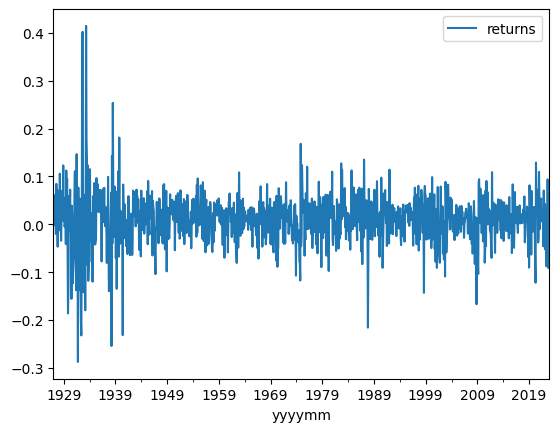

In [ ]:
data[['returns']].plot()

<Axes: xlabel='yyyymm'>

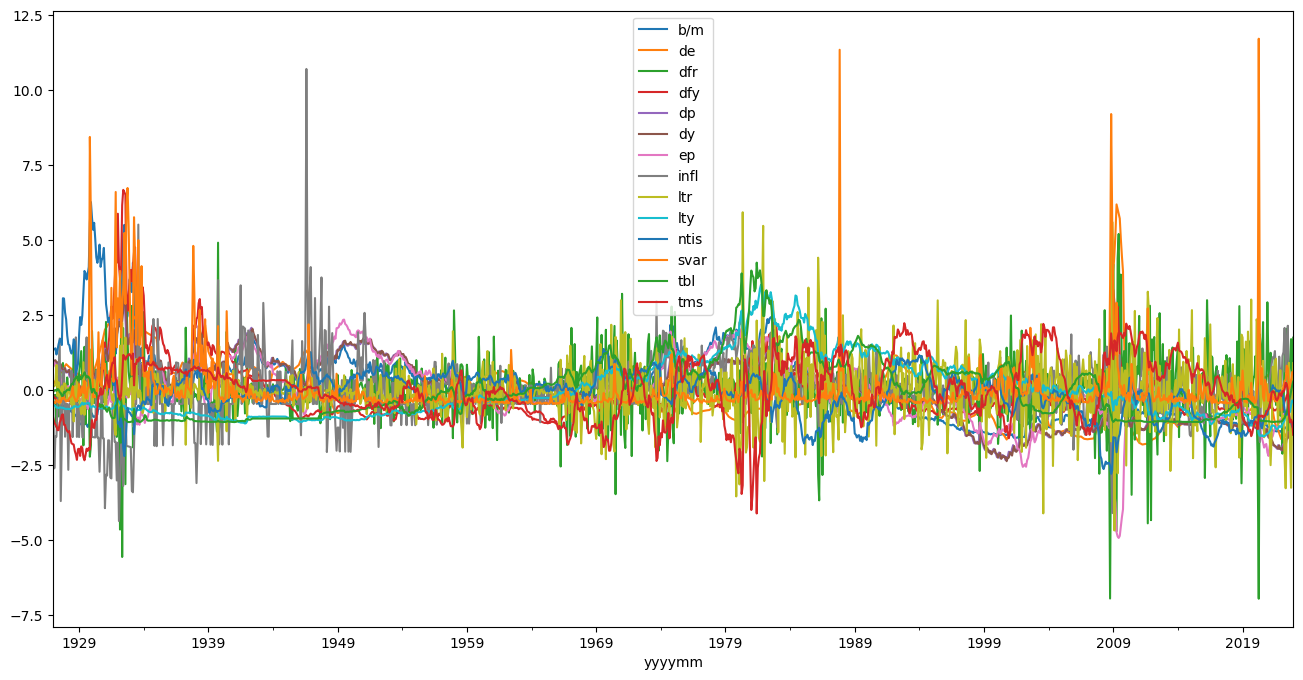

In [ ]:
# Plotting features except for returns and returns_lag_1
((data.iloc[:, :-2] - data.iloc[:, :-2].mean()) / data.iloc[:, :-2].std()).plot(figsize=(16,8))

In [ ]:
# Percentage of the data used to train in a time-series split
training_percentage = 0.9

print("Number of samples:", data.shape[0])
print("Number of training samples:", round(data.shape[0]* training_percentage))
print("Number of years in training set:", round(data.shape[0]* training_percentage) / 12)
print("Number of years in testing set:", (data.shape[0] - round(data.shape[0]* training_percentage)) / 12)

Number of samples: 1152
Number of training samples: 1037
Number of years in training set: 86.41666666666667
Number of years in testing set: 9.583333333333334


In [ ]:
# split data sample into (X_{t-1}, Y_t)
X = data.drop(columns=['returns'])
Y = data[['returns']]

# split (X_{t-1}, Y_t) into time-series training and testing sets
X_train = X.iloc[0: round(data.shape[0]* training_percentage)]
X_test = X.iloc[round(data.shape[0]* training_percentage):]

Y_train = Y.iloc[0: round(data.shape[0]* training_percentage)]
Y_test = Y.iloc[round(data.shape[0]* training_percentage):]

# splitting again
X_sub_train = X_train.iloc[0: round(X_train.shape[0]* training_percentage)]
X_validation = X_train.iloc[round(X_train.shape[0]* training_percentage):]

Y_sub_train = Y_train.iloc[0: round(X_train.shape[0]* training_percentage)]
Y_validation = Y_train.iloc[round(X_train.shape[0]* training_percentage):]

In [ ]:
X_train

,b/m,de,dfr,dfy,dp,dy,ep,infl,ltr,lty,ntis,svar,tbl,tms,returns_lag_1
yyyymm,,,,,,,,,,,,,,,
1927-01-01,0.441476,-0.586175,-0.0022,0.0100,-2.973012,-2.956570,-2.386837,0.000000,0.0078,0.0354,0.050876,0.000465,0.0307,0.0047,0.026937
1927-02-01,0.443706,-0.567601,-0.0019,0.0095,-2.942374,-2.963349,-2.374773,-0.011299,0.0075,0.0351,0.050824,0.000470,0.0323,0.0028,0.026047
1927-03-01,0.428501,-0.549182,-0.0019,0.0092,-2.979535,-2.932946,-2.430353,-0.005714,0.0088,0.0347,0.051668,0.000287,0.0329,0.0018,-0.002910
1927-04-01,0.469765,-0.531456,-0.0170,0.0092,-2.976535,-2.970053,-2.445079,-0.005747,0.0253,0.0331,0.046357,0.000924,0.0320,0.0011,0.045522
1927-05-01,0.456754,-0.512916,0.0060,0.0090,-2.984225,-2.967143,-2.471309,0.000000,-0.0005,0.0333,0.050514,0.000603,0.0339,-0.0006,0.007324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,0.349032,-1.018340,0.0140,0.0098,-3.820842,-3.813798,-2.802502,-0.002693,-0.0202,0.0246,-0.011549,0.001036,0.0007,0.0239,0.005326
2013-02-01,0.329984,-1.013728,0.0019,0.0093,-3.860852,-3.811654,-2.847124,0.002957,-0.0332,0.0291,-0.008017,0.000907,0.0007,0.0284,0.008508
2013-03-01,0.325431,-1.009180,-0.0021,0.0095,-3.862751,-3.851751,-2.853571,0.008190,0.0114,0.0285,-0.008864,0.001243,0.0010,0.0275,0.052361


In [ ]:
Y_train

,returns
yyyymm,
1927-01-01,0.026047
1927-02-01,-0.002910
1927-03-01,0.045522
1927-04-01,0.007324
1927-05-01,0.013021
...,...
2013-01-01,0.008508
2013-02-01,0.052361
2013-03-01,0.013013


## Multi-Layer Perceptron (MLP)

- A multi-layer perceptron (dense neural network) consists of:
  - **Input layer**
  - One or more **hidden layers**
  - **Output layer**
- Signal flows forward only → **feed-forward neural network**.  
- With many hidden layers, it becomes a **deep neural network (DNN)**.  

**Mathematical Formulation**

- Two-layer case:

$$
\hat{R}_{t+1} = \sum_{i=1}^p \beta_i \, \sigma(w_i^T X_t)
$$

- General MLP with $L$ layers:

$$
\sigma_L(W_L \, \sigma_{L-1}(W_{L-1} \cdots \sigma_1(W_1 X)))
$$

- For regression: final activation is linear, $\sigma_L(h) = h$.  


## Regression with Dense NNs

- Output layer: 1 unit per prediction dimension.  
- Examples:
  - Predicting market return → 1 output  
  - Predicting bounding box → 4 outputs (center $x,y$, width, height)  

**Typical Hyperparameters (Regression)**  
- Hidden layers: 1–5  
- Units per layer: 10–100  
- Hidden activation: ReLU  
- Output activation: Linear (or ReLU / sigmoid if constrained)  
- Loss: MSE, MAE, or Huber (for outliers)  


## Classification with Dense NNs

- **Binary classification** → 1 output + sigmoid activation  

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

- **Multi-label binary classification** → 1 sigmoid output per label  
- **Multi-class classification** → 1 output per class + softmax activation  

$$
\text{Softmax}(z)_i = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)}
$$

- Loss: cross-entropy  

$$
-(y \log(\hat{p}) + (1-y)\log(1-\hat{p})) \quad \text{(binary)}
$$

$$
-\sum_{k=1}^K y_k \log(\hat{p}_k) \quad \text{(multi-class)}
$$

**Typical Hyperparameters (Classification)**  

| Setting | Binary | Multi-Label | Multi-Class |
|---------|--------|-------------|-------------|
| Output Units | 1 | 1 per label | 1 per class |
| Output Activation | Sigmoid | Sigmoid | Softmax |
| Loss | Cross-entropy | Cross-entropy | Cross-entropy |


## Building Models with the Sequential API

- **Sequential model** = stack of layers, one input/output per layer.  
- Not suitable for:
  - Multiple inputs/outputs  
  - Layer sharing  
  - Residual or multi-branch architectures  

**Ways to build Sequential models**  
1. Add layers one-by-one  
2. Pass a list of layers at once


## METHOD 1: adding a layer one-by-one



- Create the sequential model

In [ ]:
model = tf.keras.Sequential()

* Build the input layer
  * We need to specify the input shape of a single observation, which isn't including the size of the sample of observations (i.e. the batch).
  * This shape is used to create the weight matrix mapping the input data to the units in the first hidden layer.

In [ ]:
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

* Add a normalization layer
  * It takes every feature and computes the batch sample's mean and standard deviation, and then takes the Z-score of each feature in the batch.
  * We do this to help convergence of gradient descent.

In [ ]:
model.add(tf.keras.layers.Normalization()) # defaults to: axis=-1

* Add a feature processing lyaer (dense hidden layer)
  * Each Desne layer manages its own weight matrix, which is called a kernel in TF Keras.
  * It also manages its own bias vector where there is one per unit.

- At this step, the model computes activation function for each unit in the hidden layer: $$h^{[1]}_{\mathbf{W_1}, b_1}(\mathbf{X}) = \sigma(\mathbf{X}\mathbf{W}_1 + b_1).$$

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='relu'))

- We will then add another feature extraction hidden layer to the sequential model which will compute the subsequent hidden layer as follows: $$h^{[2]}_{\mathbf{W}_2, b_2}(\mathbf{h^{[1]}}) = \sigma(\mathbf{h^{[1]}}\mathbf{W}_2 + b_2).$$

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='relu'))

* We sill add one more hidden layer to process the signals through the model.

* By adding another feature extraction hidden layer to the sequential model, the dense neural network will compute the subsequent hidden layer as follows: $$h^{[3]}_{\mathbf{W}_3, b_3}(\mathbf{h^{[2]}}) = \sigma(\mathbf{h^{[2]}}\mathbf{W}_3 + b_3).$$

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='relu'))

- Lastly, we will add a final dense layer for the output layer with a single unit and the linear activation function as we are predicting a single return for the SPX index.

- By adding the output layer to the sequential model, the dense neural network will compute the output as follows: $$\widehat{y}^{[4]}_{\mathbf{W}_4, b_4}(\mathbf{h^{[3]}}) = \mathbf{h^{[3]}}\mathbf{W}_4 + b_4,$$ since the final activation function is just a linear regression.

In [ ]:
model.add(tf.keras.layers.Dense(units=1)) # defaults to: activation="linear"

* We can look through the layers as they are stored in a list.

In [ ]:
model.layers

[<Normalization name=normalization, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

- We can investigate a single hidden layer's trainable weights.

- Notice the dense layer initialized the connection weights randomly, and the biases are initialized to zero.

In [ ]:
# analyze the weights in the first hidden layer
first_hidden_layer = model.layers[1]

In [ ]:
first_hidden_layer.get_weights()

[array([[ 0.35095218,  0.15934274, -0.13843462,  0.4408979 , -0.413414  ,
          0.14925459,  0.46099386, -0.32537833,  0.02330866,  0.12811771],
        [-0.40522566, -0.05255872,  0.45661792, -0.02905968,  0.00288686,
          0.26029846, -0.47144845, -0.30140394,  0.01395383, -0.42481527],
        [-0.45301354,  0.3409362 ,  0.40703455, -0.23266152,  0.35226783,
         -0.3649989 , -0.03695261,  0.06145462,  0.06534442, -0.29377997],
        [-0.2844419 ,  0.47928074, -0.38222528, -0.05524746, -0.23016527,
         -0.3713218 ,  0.2284325 , -0.31124133,  0.17763284,  0.1473799 ],
        [-0.44812846,  0.06235012, -0.16252688, -0.11086705,  0.44533822,
         -0.08779553,  0.03083435, -0.23973674, -0.3695622 ,  0.21146932],
        [ 0.11406168,  0.00779483, -0.4626969 , -0.3726371 ,  0.2855048 ,
          0.3587809 , -0.06677324, -0.18247807, -0.45750743, -0.45198697],
        [ 0.25382957,  0.3219776 , -0.12151298,  0.21512154, -0.1801931 ,
          0.27328393, -0.1809858

In [ ]:
kernel, bias = first_hidden_layer.get_weights()

In [ ]:
kernel.shape

(15, 10)

In [ ]:
pd.DataFrame(kernel)

,0,1,2,3,4,5,6,7,8,9
0,0.350952,0.159343,-0.138435,0.440898,-0.413414,0.149255,0.460994,-0.325378,0.023309,0.128118
1,-0.405226,-0.052559,0.456618,-0.029060,0.002887,0.260298,-0.471448,-0.301404,0.013954,-0.424815
2,-0.453014,0.340936,0.407035,-0.232662,0.352268,-0.364999,-0.036953,0.061455,0.065344,-0.293780
3,-0.284442,0.479281,-0.382225,-0.055247,-0.230165,-0.371322,0.228433,-0.311241,0.177633,0.147380
4,-0.448128,0.062350,-0.162527,-0.110867,0.445338,-0.087796,0.030834,-0.239737,-0.369562,0.211469
5,0.114062,0.007795,-0.462697,-0.372637,0.285505,0.358781,-0.066773,-0.182478,-0.457507,-0.451987
6,0.253830,0.321978,-0.121513,0.215122,-0.180193,0.273284,-0.180986,-0.074993,0.347613,0.320774
7,0.182752,0.388874,0.345670,-0.268864,0.132734,-0.401860,0.444945,0.214485,0.059358,-0.305924
8,-0.295758,0.463096,-0.440237,-0.180799,-0.257464,-0.336194,0.356106,0.331060,0.123065,0.035402
9,0.044339,0.210005,-0.018029,-0.361574,0.391612,-0.128149,0.296940,0.349996,-0.116406,-0.430235


In [ ]:
bias.shape

(10,)

In [ ]:
pd.DataFrame(bias)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


- We can also look at a summary and a graphical diagram of the sequential model that gives the input and output shapes of each hidden layer, as well as the number of parameters per layer and across the entire model.

- The model's **summary()** method displays all the model's layers, including each layer's name, its output shape, and its number of parameters

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422 (1.65 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 31 (128.00 B)

## METHOD 2: passing a list of layers



* Create a sequential model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
model.layers

[<Normalization name=normalization_1, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>]

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422 (1.65 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 31 (128.00 B)

## A Common Debugging Workflow: add() + summary()

- When building a new Sequential architecture, it's useful to incrementally stack layers with **add()** and frequently print model summaries.

- This enables us to monitor how a stack of layers is extracting signals from the features.

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
print(model.summary())

model.add(tf.keras.layers.Normalization())
print(model.summary())

model.add(tf.keras.layers.Dense(units=10, activation="relu"))
print(model.summary())

model.add(tf.keras.layers.Dense(units=10, activation="relu"))
print(model.summary())

model.add(tf.keras.layers.Dense(units=10, activation="relu"))
print(model.summary())

model.add(tf.keras.layers.Dense(units=1))
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 15)             │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (128.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 31 (128.00 B)

None


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191 (768.00 B)

 Trainable params: 160 (640.00 B)

 Non-trainable params: 31 (128.00 B)

None


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 270 (1.05 KB)

 Non-trainable params: 31 (128.00 B)

None


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 380 (1.48 KB)

 Non-trainable params: 31 (128.00 B)

None


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422 (1.65 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 31 (128.00 B)

None


## What To Do Once We Have Specified a Model Architecture?

After defining the architecture, the next steps are:  
- **Train the model**  
- **Evaluate performance**  
- **Run inference (predictions)**  
- **Save and restore the model** for later use  

---

### Compiling the Model

The `compile()` method specifies:  
- Loss function  
- Optimizer  
- Extra metrics (optional)  




In [ ]:
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.R2Score()])

### Training the Model

The built-in training loop in Keras is accessed with the `.fit()` method.  

You must provide:  
- Training data ($X_{train}, Y_{train}$)  
- Number of epochs (default = 1, but typically much larger to ensure convergence)  
- Batch size  
- (Optional) Validation data  

Keras will evaluate the **loss** and any specified **metrics** on the training and validation sets after each epoch.  

**Notes:**  
- Validation data is useful to monitor generalization performance.  
- If validation performance is much worse than training performance → the model may be:  
  - **Overfitting**  
  - Containing a **bug**  
  - Suffering from **data leakage (lookahead bias)**  


In [ ]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=True, shuffle=False)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4490 - r2_score: -100.5133 - val_loss: 0.0646 - val_r2_score: -32.6804
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 - r2_score: -2.4020 - val_loss: 0.0080 - val_r2_score: -3.1769
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - r2_score: -0.1846 - val_loss: 0.0042 - val_r2_score: -1.1806
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - r2_score: -0.1409 - val_loss: 0.0035 - val_r2_score: -0.8194
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - r2_score: -0.1597 - val_loss: 0.0034 - val_r2_score: -0.7642
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - r2_score: -0.1614 - val_loss: 0.0034 - val_r2_score: -0.7544
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - r2_score: -0.1593 - val_loss: 0.0033 - val_r2_score: -0.7430
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - r2_score: -0.1575 - val_lo

### The `fit()` Method and the History Object

The `.fit()` method returns a **History object** that stores useful information:  

- `history.params` → training parameters  
- `history.epoch` → list of completed epochs  
- `history.history` → dictionary with loss and metrics for both training and validation sets (if provided)  

We can convert `history.history` into a Pandas DataFrame and use `.plot()` to visualize the **learning curves** (loss/metrics over epochs).  
This is one of the most common ways to monitor convergence and detect overfitting.

In [ ]:
history.params

{'verbose': True, 'epochs': 150, 'steps': 30}

In [ ]:
history = pd.DataFrame(history.history)

history

,loss,r2_score,val_loss,val_r2_score
0,0.238762,-73.605118,0.064643,-32.680367
1,0.010031,-2.134312,0.008017,-3.176907
2,0.003933,-0.229009,0.004185,-1.180556
3,0.003724,-0.163561,0.003492,-0.819432
4,0.003767,-0.177076,0.003386,-0.764220
...,...,...,...,...
145,0.000163,0.949051,0.007001,-2.647874
146,0.000159,0.950445,0.006783,-2.533840
147,0.000155,0.951627,0.006580,-2.428461
148,0.000152,0.952551,0.006375,-2.321726


<Axes: >

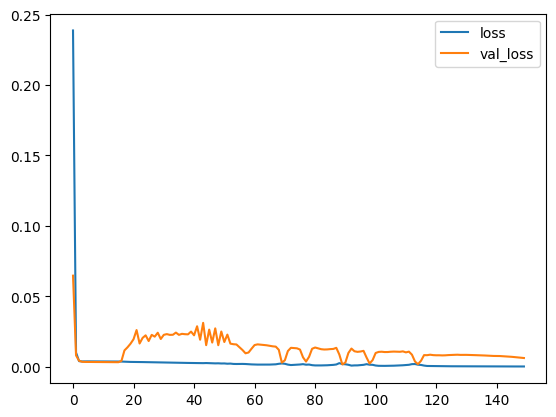

In [ ]:
history[['loss', 'val_loss']].plot()

<Axes: >

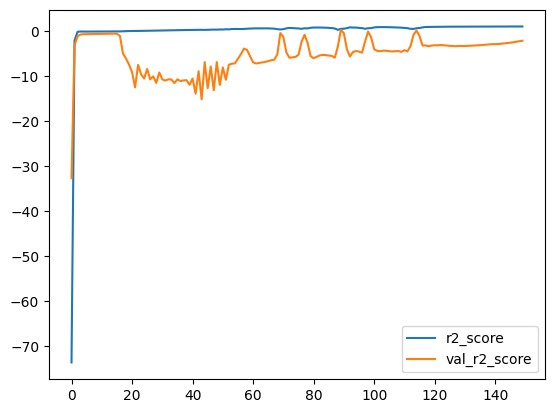

In [ ]:
history[['r2_score', 'val_r2_score']].plot()

<Axes: >

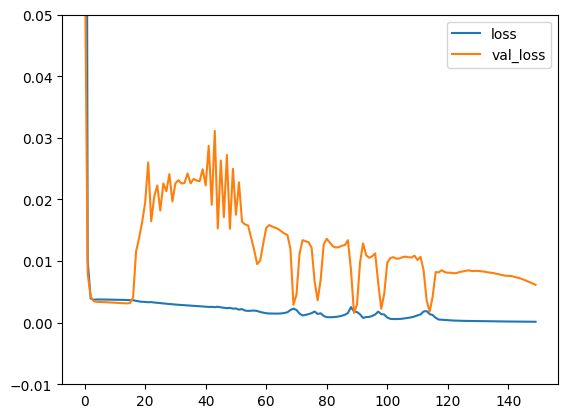

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.01, 0.05])

<Axes: >

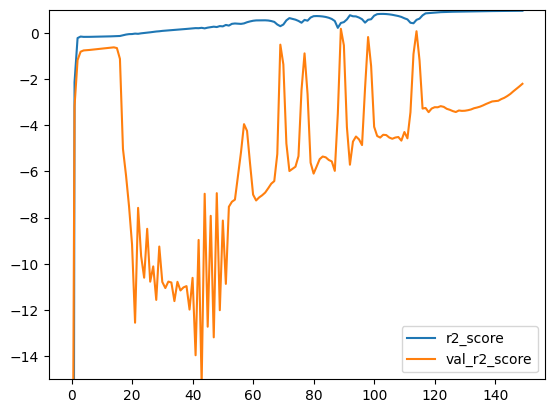

In [ ]:
history[['r2_score', 'val_r2_score']].plot(ylim=[-15,1])

### Monitoring Training with Epochs and Validation

At each epoch of training, Keras displays:  
- The number of mini-batches processed (left side of the progress bar)  
- By default, the **batch size** is 32 samples  
- The **average training time per sample**  
- The **loss and metrics** on both the training set and the validation set  

---

### Validation Options

- We can provide a validation set directly using `validation_data`.  
- Alternatively, we can set `validation_split` to reserve a portion of the training data for validation.  
  - Example: `validation_split=0.1` uses the last 10% of the data (before shuffling) as the validation set.  

**Caution**: We must be careful not to introduce a **lookahead bias** when choosing validation data.  

---

### Error Computation

- **Training error** is computed using a running mean during each epoch.  
- **Validation error** is computed at the end of each epoch.  


In [ ]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=True, shuffle=False)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9364e-04 - r2_score: 0.9440 - val_loss: 0.0059 - val_r2_score: -2.0840
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9318e-04 - r2_score: 0.9438 - val_loss: 0.0057 - val_r2_score: -1.9928
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9541e-04 - r2_score: 0.9430 - val_loss: 0.0056 - val_r2_score: -1.9033
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9940e-04 - r2_score: 0.9418 - val_loss: 0.0055 - val_r2_score: -1.8558
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0059e-04 - r2_score: 0.9412 - val_loss: 0.0053 - val_r2_score: -1.7855
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1508e-04 - r2_score: 0.9378 - val_loss: 0.0053 - val_r2_score: -1.7751
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1758e-04 - r2_score: 0.9369 - val_loss: 0.0052 - val_r2_score: -1.7219
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2674e-04 - r2_s

In [ ]:
history = pd.DataFrame(history.history)

history

,loss,r2_score,val_loss,val_r2_score
0,0.000150,0.953033,0.005919,-2.083978
1,0.000152,0.952622,0.005744,-1.992825
2,0.000155,0.951568,0.005572,-1.903307
3,0.000160,0.950065,0.005481,-1.855793
4,0.000163,0.949116,0.005346,-1.785534
...,...,...,...,...
145,0.000375,0.882949,0.002146,-0.118344
146,0.000358,0.888136,0.002369,-0.234052
147,0.000344,0.892567,0.002501,-0.303180
148,0.000332,0.896151,0.002578,-0.343190


<Axes: >

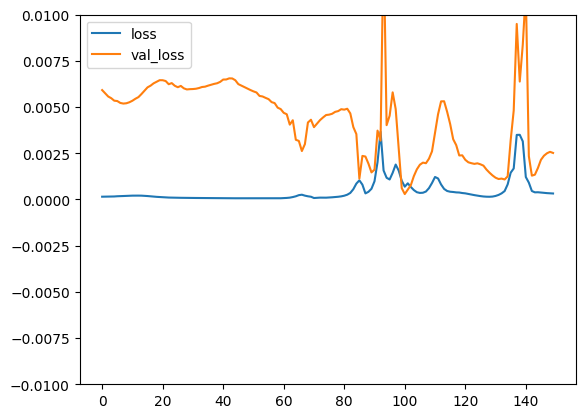

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.01, 0.01])

<Axes: >

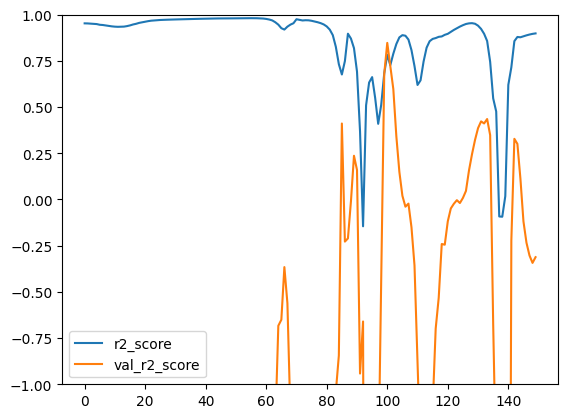

In [ ]:
history[['r2_score', 'val_r2_score']].plot(ylim=[-1,1])

### Deciding What to Do Next During Training

- If we observe that the **validation loss is still decreasing**, we should continue training — this indicates the model has not yet converged.  
  - This can be done simply by calling the `.fit()` method again, since Keras continues training from where it left off.  

---

### When Performance Is Unsatisfactory

If we are not satisfied with the model’s performance, we should revisit **hyperparameters**:  

- **Learning rate** → the first parameter to check and adjust  
- **Optimizer** → try alternatives (always retune learning rate after changes)  
- **Model architecture** → adjust the number of layers, units per layer, or activation functions  
- **Batch size** → change using the `batch_size` argument in `.fit()` (default = 32)  

We will return to hyperparameter tuning more systematically at the end of this module.  

---

### Final Evaluation Before Deployment

- Once we are satisfied with the validation score, we must evaluate on the **test set** to estimate the **generalization error**.  
- This ensures the model is reliable before deploying it in production.  

We can use:  
- `.evaluate()` → reports loss and metrics  
- `.predict()` → generates predictions (supports options like `batch_size` and `sample_weight`)  


### Making Predictions (Inference)

- We can use the **`.predict()`** method for inference, i.e. generating predictions from the trained model.  

- In practice:  

$$
\texttt{model.predict(data)} \;\;\iff\;\; \texttt{model(data)}
$$



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


<Axes: xlabel='yyyymm'>

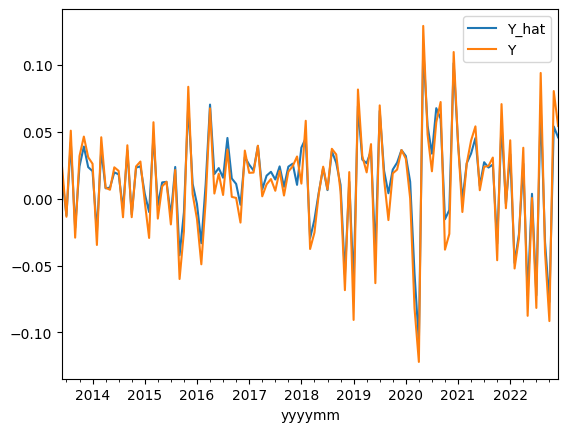

In [ ]:
Y_hat_Y_test_set = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=['Y_hat'])

Y_hat_Y_test_set['Y'] = Y_test
Y_hat_Y_test_set['error'] = Y_hat_Y_test_set['Y_hat'] - Y_hat_Y_test_set['Y']

Y_hat_Y_test_set[['Y_hat', 'Y']].plot()

<Axes: xlabel='yyyymm'>

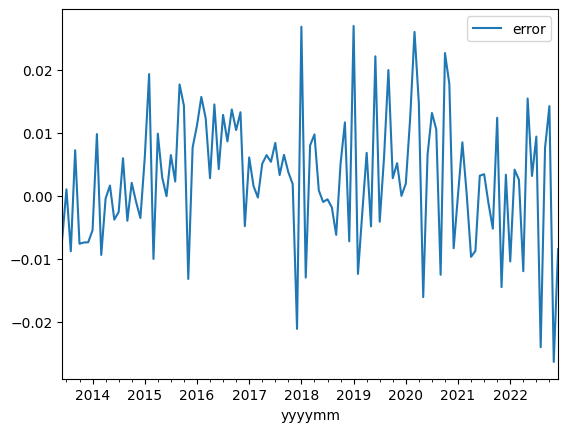

In [ ]:
Y_hat_Y_test_set[['error']].plot()

- Rather than using the predict method, and then evaluating the error by passing $Y$ and $\widehat{Y}$ into some error function, we can just use the **.evaluate()** method, which will generate the predictions and pass them to the loss and metric functions specified in the compile step.

In [ ]:
model.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8281e-05 - r2_score: 0.9240 


[0.00011440765229053795, 0.9369874000549316]

- Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

Streaming output truncated to the last 5000 lines.
Epoch 1251/3750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - r2_score: -0.0317 - val_loss: 0.0020 - val_r2_score: -0.0446
Epoch 1252/3750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - r2_score: -0.0316 - val_loss: 0.0020 - val_r2_score: -0.0444
Epoch 1253/3750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - r2_score: -0.0316 - val_loss: 0.0020 - val_r2_score: -0.0443
Epoch 1254/3750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - r2_score: -0.0315 - val_loss: 0.0020 - val_r2_score: -0.0441
Epoch 1255/3750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0050 - r2_score: -0.0315 - val_loss: 0.0020 - val_r2_score: -0.0439
Epoch 1256/3750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - r2_score: -0.0314 - val_loss: 0.0020 - val_r2_score: -0.0438
Epoch 1257/3750
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - r2_score: -0.0314 - val_loss: 0.0020 - val_r2_score: -0.0436
Epoch 1258/3750
8/8 ━━━━━━

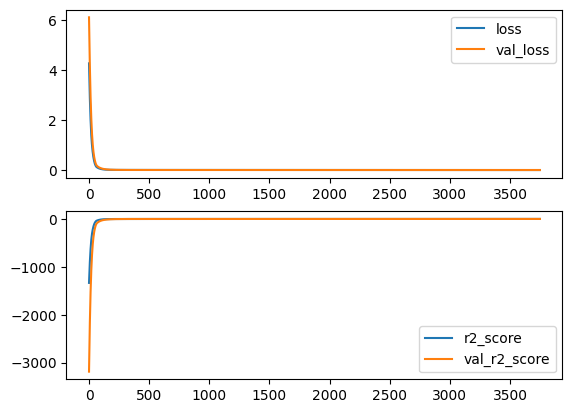

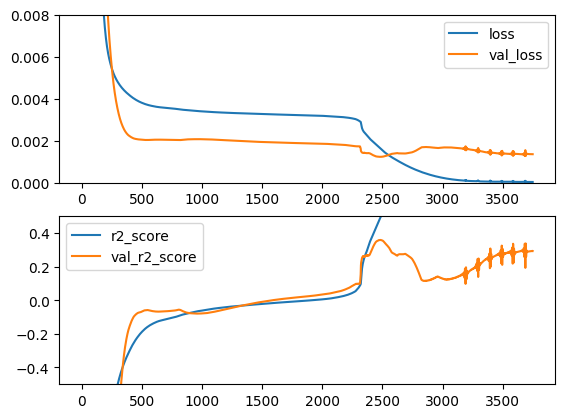

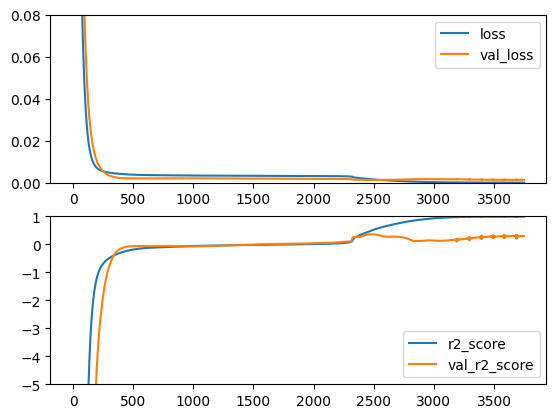

In [ ]:
## Try smaller learning rates and bigger batch sizes

learning_rate = 1e-4
batch_size = 128
epochs_multiplier = 25

tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=[tf.keras.metrics.R2Score()])

history = model.fit(X_train, Y_train,
                    epochs=150*epochs_multiplier,
                    batch_size=batch_size,
                    validation_split=0.1,
                    verbose=True,
                    shuffle=False)

history = pd.DataFrame(history.history)

fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
history[['loss', 'val_loss']].plot(ax=axes[0])
history[['r2_score', 'val_r2_score']].plot(ax=axes[1])

plt.show()

fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
history[['loss', 'val_loss']].plot(ax=axes[0], ylim=[0,0.008])
history[['r2_score', 'val_r2_score']].plot(ax=axes[1], ylim=[-0.5, 0.5])

plt.show()

fig, axes = plt.subplots(nrows=2, ncols=1)
axes = axes.flatten()
history[['loss', 'val_loss']].plot(ax=axes[0], ylim=[0,0.08])
history[['r2_score', 'val_r2_score']].plot(ax=axes[1], ylim=[-5, 1])

plt.show()

### Try Different Dense Architectures

- We should experiment with different

  - number of hidden layers,

  - number of units per hidden layer,

  - activation functions,

  - optimizers,

  - loss functions,

  - etc.

In [ ]:
## Model 1: Less complex model

# set the random seed for reproducible results
# the random weights of the hidden layers and the output layer will be the same
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=15, activation="relu"),
    tf.keras.layers.Dense(units=15, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.R2Score()])

In [ ]:
history = model.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation))

history = pd.DataFrame(history.history)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0225 - r2_score: -6.8015 - val_loss: 0.0097 - val_r2_score: -4.0467
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062 - r2_score: -1.0401 - val_loss: 0.0052 - val_r2_score: -1.7256
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - r2_score: -0.4420 - val_loss: 0.0031 - val_r2_score: -0.6136
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - r2_score: -0.1686 - val_loss: 0.0023 - val_r2_score: -0.1856
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - r2_score: -0.0369 - val_loss: 0.0019 - val_r2_score: -0.0152
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - r2_score: 0.0213 - val_loss: 0.0019 - val_r2_score: 0.0047
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - r2_score: 0.0449 - val_loss: 0.0019 - val_r2_score: 0.0164
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - r2_score: 0.0620 - val_loss: 0.00

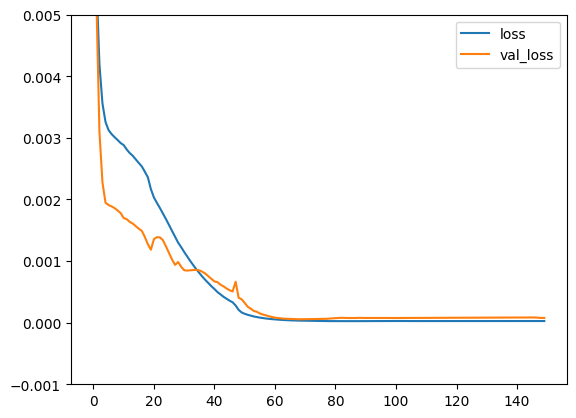

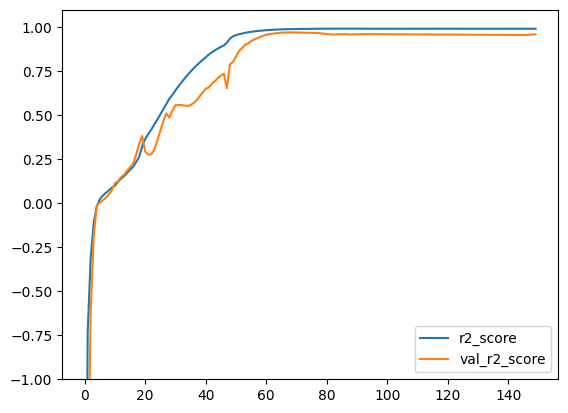

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.001, 0.005])
plt.show()

history[['r2_score', 'val_r2_score']].plot(ylim=[-1,1.1])
plt.show()

In [ ]:
history = model.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation))

history = pd.DataFrame(history.history)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5587e-05 - r2_score: 0.9915 - val_loss: 7.9027e-05 - val_r2_score: 0.9588
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5046e-05 - r2_score: 0.9917 - val_loss: 7.8504e-05 - val_r2_score: 0.9591
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5108e-05 - r2_score: 0.9917 - val_loss: 7.8770e-05 - val_r2_score: 0.9590
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5279e-05 - r2_score: 0.9916 - val_loss: 7.8583e-05 - val_r2_score: 0.9591
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5296e-05 - r2_score: 0.9916 - val_loss: 7.9090e-05 - val_r2_score: 0.9588
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5434e-05 - r2_score: 0.9916 - val_loss: 7.9306e-05 - val_r2_score: 0.9587
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5670e-05 - r2_score: 0.9915 - val_loss: 7.9141e-05 - val_r2_score: 0.9588
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

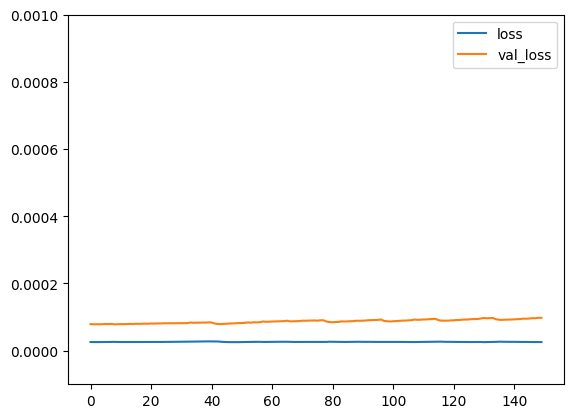

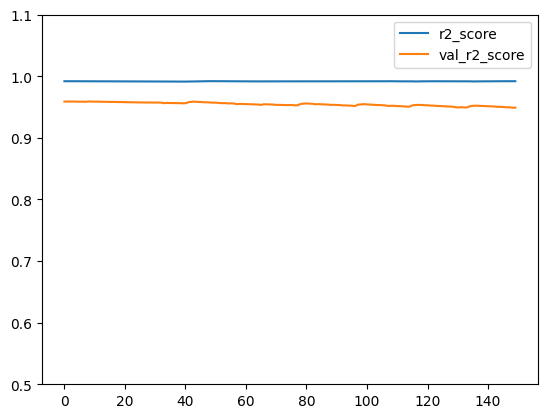

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.0001, 0.001])
plt.show()

history[['r2_score', 'val_r2_score']].plot(ylim=[0.5,1.1])
plt.show()

In [ ]:
## Model 2: More complex model

# set the random seed for reproducible results
# the random weights of the hidden layers and the output layer will be the same
tf.keras.utils.set_random_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=15, activation="relu"),
    tf.keras.layers.Dense(units=15, activation="relu"),
    tf.keras.layers.Dense(units=15, activation="relu"),
    tf.keras.layers.Dense(units=15, activation="relu"),
    tf.keras.layers.Dense(units=15, activation="relu"),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.R2Score()])

In [ ]:
history = model.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation))

history = pd.DataFrame(history.history)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - r2_score: -0.1712 - val_loss: 0.0020 - val_r2_score: -0.0453
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0032 - r2_score: -0.0340 - val_loss: 0.0021 - val_r2_score: -0.1094
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - r2_score: 8.8229e-04 - val_loss: 0.0018 - val_r2_score: 0.0839
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - r2_score: 0.0254 - val_loss: 0.0019 - val_r2_score: 0.0184
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - r2_score: 0.0693 - val_loss: 0.0020 - val_r2_score: -0.0260
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - r2_score: 0.0908 - val_loss: 0.0017 - val_r2_score: 0.0987
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - r2_score: 0.1870 - val_loss: 0.0014 - val_r2_score: 0.2850
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - r2_score: 0.3294 - val_loss: 0.001

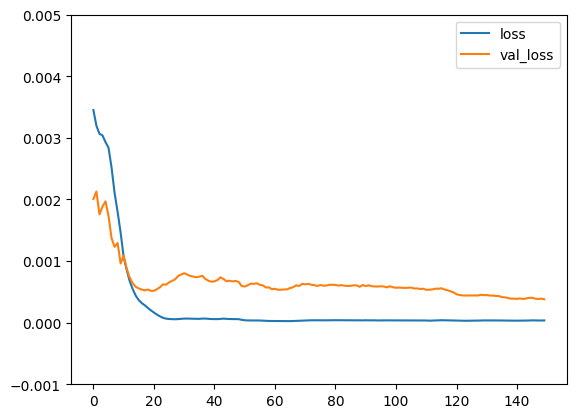

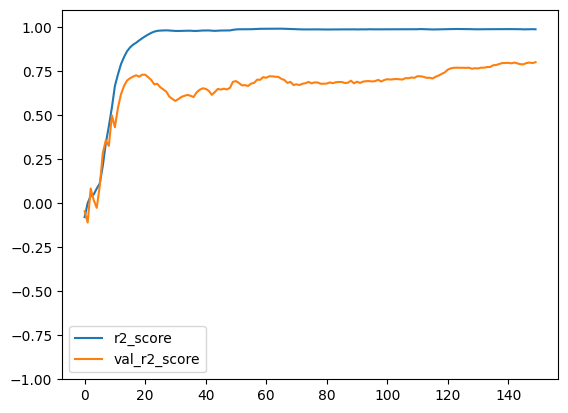

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.001, 0.005])
plt.show()

history[['r2_score', 'val_r2_score']].plot(ylim=[-1,1.1])
plt.show()

In [ ]:
history = model.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation))

history = pd.DataFrame(history.history)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.7543e-05 - r2_score: 0.9836 - val_loss: 3.8982e-04 - val_r2_score: 0.7969
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7162e-05 - r2_score: 0.9837 - val_loss: 3.7786e-04 - val_r2_score: 0.8031
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6366e-05 - r2_score: 0.9840 - val_loss: 3.6539e-04 - val_r2_score: 0.8096
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3654e-05 - r2_score: 0.9849 - val_loss: 3.6946e-04 - val_r2_score: 0.8075
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4542e-05 - r2_score: 0.9846 - val_loss: 3.5934e-04 - val_r2_score: 0.8128
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1772e-05 - r2_score: 0.9855 - val_loss: 3.5779e-04 - val_r2_score: 0.8136
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2356e-05 - r2_score: 0.9854 - val_loss: 3.5493e-04 - val_r2_score: 0.8151
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

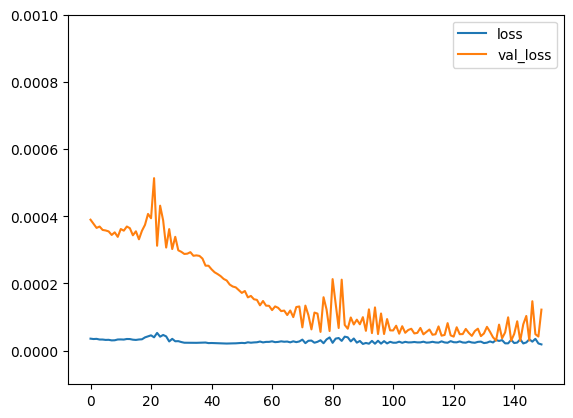

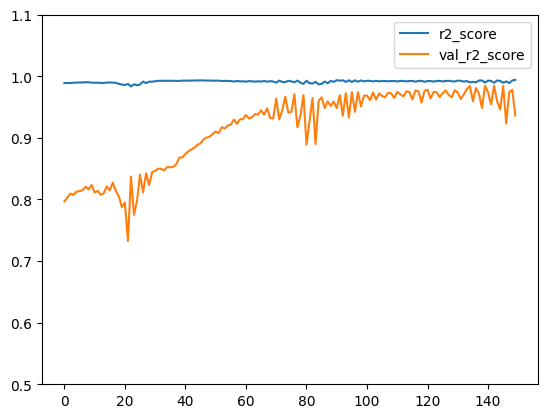

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.0001, 0.001])
plt.show()

history[['r2_score', 'val_r2_score']].plot(ylim=[0.5,1.1])
plt.show()

In [ ]:
history = model.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation))

history = pd.DataFrame(history.history)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1620e-05 - r2_score: 0.9857 - val_loss: 2.5657e-05 - val_r2_score: 0.9866
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8710e-05 - r2_score: 0.9938 - val_loss: 3.4695e-05 - val_r2_score: 0.9819
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3457e-05 - r2_score: 0.9922 - val_loss: 1.5399e-04 - val_r2_score: 0.9198
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3017e-05 - r2_score: 0.9817 - val_loss: 2.1081e-05 - val_r2_score: 0.9890
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7077e-05 - r2_score: 0.9943 - val_loss: 2.5098e-05 - val_r2_score: 0.9869
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9333e-05 - r2_score: 0.9935 - val_loss: 1.2373e-04 - val_r2_score: 0.9355
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0020e-05 - r2_score: 0.9863 - val_loss: 2.7591e-05 - val_r2_score: 0.9856
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

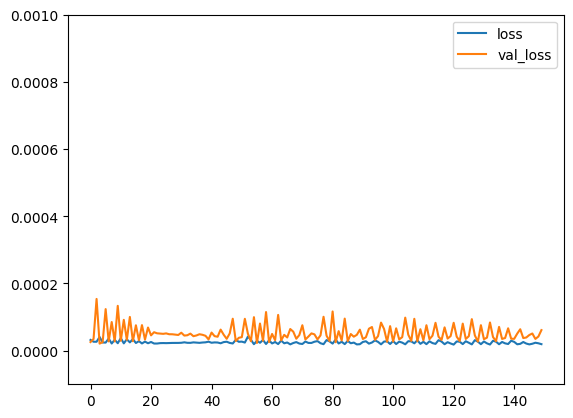

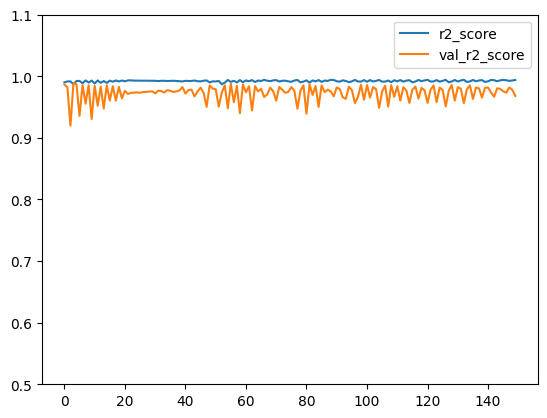

In [ ]:
history[['loss', 'val_loss']].plot(ylim=[-0.0001, 0.001])
plt.show()

history[['r2_score', 'val_r2_score']].plot(ylim=[0.5,1.1])
plt.show()

### Feature Extraction with a Sequential Model

- Once we have built a Sequential model, we can access each **layer** just like a function.  
- Each layer has an **input** and **output** attribute, which we can use to extract intermediate results.  

This is useful when:  
- We want to inspect what happens **layer-by-layer**  
- We are running **model diagnostics**  
- We are applying interpretability tools (e.g., SHAP values, correlations, visualizations)  

---

### Using the Keras `Model` Class

- We use the [Keras `Model` class](https://keras.io/api/models/model/) to implement feature extraction.  
- The `Model` class is more flexible than the Sequential API because:  
  - It allows **multiple inputs and outputs**  
  - We can specify the **forward pass** explicitly  
- The Sequential API is simply a special case of the `Model` class where the model is just a **stack of single-input, single-output layers**.  


In [ ]:
model

<Sequential name=sequential_5, built=True>

In [ ]:
model.inputs

[<KerasTensor shape=(None, 15), dtype=float32, sparse=False, ragged=False, name=keras_tensor_49>]

In [ ]:
model.layers

[<Normalization name=normalization_5, built=True>,
 <Dense name=dense_19, built=True>,
 <Dense name=dense_20, built=True>,
 <Dense name=dense_21, built=True>,
 <Dense name=dense_22, built=True>,
 <Dense name=dense_23, built=True>,
 <Dense name=dense_24, built=True>]

In [ ]:
model.layers[3].output

<KerasTensor shape=(None, 15), dtype=float32, sparse=False, ragged=False, name=keras_tensor_53>

In [ ]:
feature_extractor = tf.keras.Model(inputs=model.inputs,
                                   outputs=[model.layers[0].output, # normalization layer
                                            model.layers[1].output, model.layers[2].output, model.layers[3].output, model.layers[4].output, model.layers[5].output, # hidden layers
                                            model.layers[6].output]) # output layer

In [ ]:
# Call the feature extractor model on a single point of data

sample_data = X_train.iloc[[0], :]

feature_extractor(sample_data)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_49']
Received: inputs=Tensor(shape=(1, 15))
  warnings.warn(msg)


[<tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[ 4.4147584e-01, -5.8617508e-01, -2.2000000e-03,  9.9999998e-03,
         -2.9730124e+00, -2.9565694e+00, -2.3868372e+00,  0.0000000e+00,
          7.7999998e-03,  3.5399999e-02,  5.0876178e-02,  4.6461780e-04,
          3.0700000e-02,  4.6999999e-03,  2.6937000e-02]], dtype=float32)>,
 <tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[0.1599392 , 0.        , 0.        , 0.05002579, 0.15930617,
         0.36733857, 0.        , 0.31664652, 0.        , 0.3508712 ,
         0.        , 0.        , 0.        , 1.1356767 , 0.05269171]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[0.58507514, 0.18906851, 0.        , 0.        , 0.08582275,
         0.06342329, 0.1457431 , 0.        , 0.21475762, 0.        ,
         0.        , 0.        , 0.        , 0.08524253, 0.        ]],
       dtype=float32)>,
 <tf.Tensor: shape=(1, 15), dtype=float32, numpy=
 array([[0.09984767, 0.        , 0.    

In [ ]:
processed_features = feature_extractor(sample_data)

np.squeeze(processed_features[0].numpy())

array([ 4.4147584e-01, -5.8617508e-01, -2.2000000e-03,  9.9999998e-03,
       -2.9730124e+00, -2.9565694e+00, -2.3868372e+00,  0.0000000e+00,
        7.7999998e-03,  3.5399999e-02,  5.0876178e-02,  4.6461780e-04,
        3.0700000e-02,  4.6999999e-03,  2.6937000e-02], dtype=float32)

- This allows us to look how each layer is processing a single point of data.

In [ ]:
pd.DataFrame({'Input_Layer': np.squeeze(sample_data.values),
              'Normalization_Layer': np.squeeze(processed_features[0].numpy()),
              'Processing_Layer_1': np.squeeze(processed_features[1].numpy()),
              'Processing_Layer_2': np.squeeze(processed_features[2].numpy()),
              'Processing_Layer_3': np.squeeze(processed_features[3].numpy()),
              'Processing_Layer_4': np.squeeze(processed_features[4].numpy()),
              'Processing_Layer_5': np.squeeze(processed_features[5].numpy()),
              'Output_Layer': np.squeeze(processed_features[6].numpy()),},
              index=sample_data.columns)

,Input_Layer,Normalization_Layer,Processing_Layer_1,Processing_Layer_2,Processing_Layer_3,Processing_Layer_4,Processing_Layer_5,Output_Layer
b/m,0.441476,0.441476,0.159939,0.585075,0.099848,0.297706,0.056672,0.025083
de,-0.586175,-0.586175,0.000000,0.189069,0.000000,0.156153,0.000000,0.025083
dfr,-0.002200,-0.002200,0.000000,0.000000,0.000000,0.016612,0.000000,0.025083
dfy,0.010000,0.010000,0.050026,0.000000,0.000000,0.000000,0.000000,0.025083
dp,-2.973012,-2.973012,0.159306,0.085823,0.056693,0.065881,0.111914,0.025083
dy,-2.956570,-2.956569,0.367339,0.063423,0.240222,0.000000,0.000000,0.025083
ep,-2.386837,-2.386837,0.000000,0.145743,0.000000,0.000000,0.000000,0.025083
infl,0.000000,0.000000,0.316647,0.000000,0.040259,0.000000,0.000000,0.025083
ltr,0.007800,0.007800,0.000000,0.214758,0.000000,0.005227,0.100245,0.025083
lty,0.035400,0.035400,0.350871,0.000000,0.000000,0.000000,0.000000,0.025083


- We can also treat each layer as algorithmically generating new features.

- Thinking about each layer as a new feature representation allows us to do the same type of descriptive analytics of the layers that we can do with the original data set.

  - This includes correlating the newly represented features with each other, with the target, and with the original feature variables.

  - It can also include any types of plots, linear regressions, scatter plots, univariate or multivariate analysis, etc.

- Hopefully we will be able to understand what the layers are doing to the features, but it is more likely that they won't be easily interpreted.

#### Layers vs Target

- We will look at how the layer representations of the data relate to each other and to the target.

In [ ]:
layer_1_feature_representations = pd.DataFrame(feature_extractor(X_train)[1].numpy(), index=X_train.index)

layer_1_data = pd.concat([layer_1_feature_representations, Y_train], axis=1)

layer_1_data

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_49']
Received: inputs=Tensor(shape=(1037, 15))
  warnings.warn(msg)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,returns
yyyymm,,,,,,,,,,,,,,,,
1927-01-01,0.159939,0.0,0.0,0.050026,0.159306,0.367339,0.0,0.316646,0.0,0.350871,0.0,0.0,0.0,1.135677,0.052692,0.026047
1927-02-01,0.173814,0.0,0.0,0.051189,0.158746,0.375796,0.0,0.329587,0.0,0.367550,0.0,0.0,0.0,1.126499,0.054738,-0.002910
1927-03-01,0.148328,0.0,0.0,0.056503,0.153850,0.355349,0.0,0.314029,0.0,0.381411,0.0,0.0,0.0,1.169477,0.059410,0.045522
1927-04-01,0.183962,0.0,0.0,0.089070,0.123609,0.370693,0.0,0.320130,0.0,0.366930,0.0,0.0,0.0,1.152307,0.035458,0.007324
1927-05-01,0.174895,0.0,0.0,0.071625,0.120595,0.355280,0.0,0.320466,0.0,0.414241,0.0,0.0,0.0,1.172519,0.063074,0.013021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,0.081176,0.0,0.0,0.000000,0.393322,0.519486,0.0,0.444478,0.0,0.287105,0.0,0.0,0.0,1.376111,0.038447,0.008508
2013-02-01,0.064470,0.0,0.0,0.000000,0.374419,0.504091,0.0,0.438870,0.0,0.279410,0.0,0.0,0.0,1.404914,0.033293,0.052361
2013-03-01,0.084599,0.0,0.0,0.000000,0.375126,0.513021,0.0,0.449881,0.0,0.257644,0.0,0.0,0.0,1.382879,0.014414,0.013013


In [ ]:
layer_1_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1037.0,0.208206,0.101362,0.000000,0.153848,0.213583,0.258872,0.801668
1,1037.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1037.0,0.000103,0.001753,0.000000,0.000000,0.000000,0.000000,0.046597
3,1037.0,0.123743,0.126409,0.000000,0.032556,0.111566,0.167016,0.874955
4,1037.0,0.166758,0.136535,0.000000,0.067700,0.136037,0.234880,0.630289
5,1037.0,0.419518,0.076050,0.000000,0.381533,0.418522,0.466128,0.600411
6,1037.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1037.0,0.350011,0.109578,0.000000,0.271477,0.354534,0.421714,0.620276
8,1037.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1037.0,0.429273,0.169685,0.086428,0.315889,0.417747,0.493765,1.564247


<Axes: xlabel='yyyymm'>

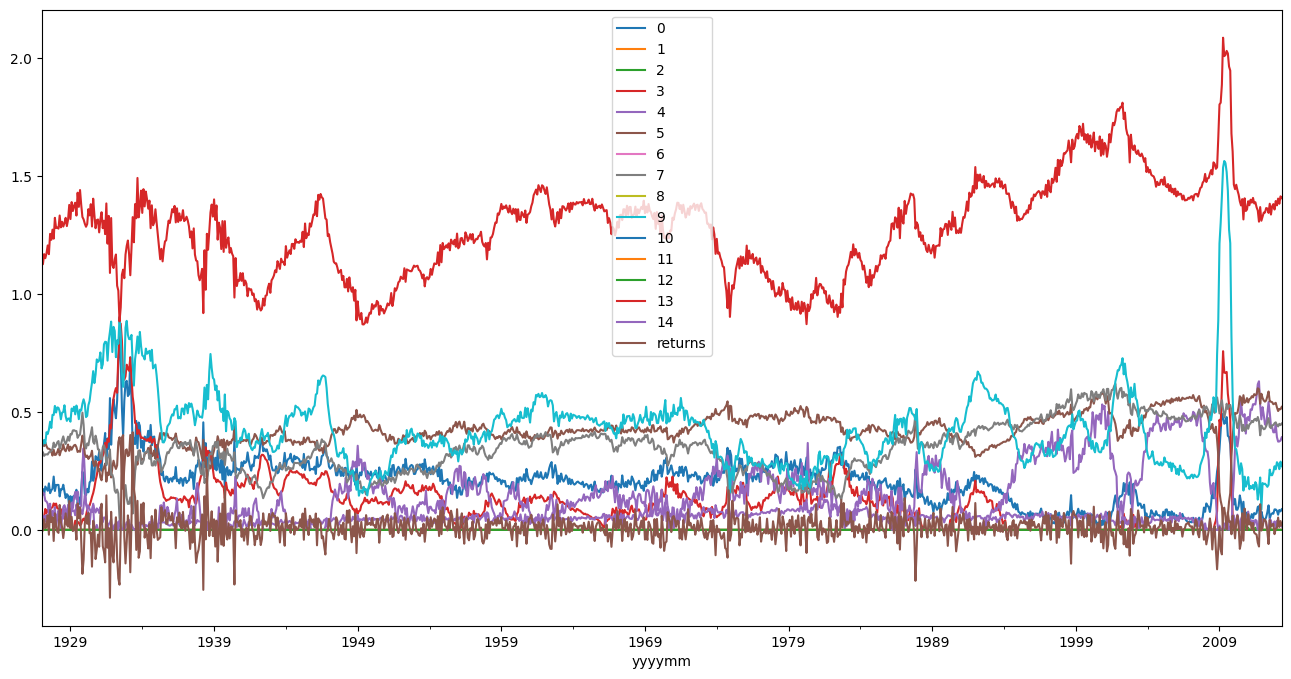

In [ ]:
layer_1_data.plot(figsize=(16,8))

In [ ]:
layer_1_data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,returns
0,1.000000,NaN,-0.102432,0.906568,-0.713795,-0.581260,NaN,-0.679187,NaN,0.489631,NaN,NaN,NaN,-0.459469,-0.163048,-0.245066
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.102432,NaN,1.000000,-0.057634,0.148523,0.094344,NaN,0.037895,NaN,-0.070073,NaN,NaN,NaN,0.029708,0.038720,0.073148
3,0.906568,NaN,-0.057634,1.000000,-0.633062,-0.659362,NaN,-0.569953,NaN,0.600851,NaN,NaN,NaN,-0.262497,-0.271397,0.002366
4,-0.713795,NaN,0.148523,-0.633062,1.000000,0.824552,NaN,0.456402,NaN,-0.591293,NaN,NaN,NaN,0.217882,0.132626,-0.030727
5,-0.581260,NaN,0.094344,-0.659362,0.824552,1.000000,NaN,0.224915,NaN,-0.806750,NaN,NaN,NaN,-0.061504,0.214788,-0.155823
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.679187,NaN,0.037895,-0.569953,0.456402,0.224915,NaN,1.000000,NaN,0.180773,NaN,NaN,NaN,0.901615,-0.131592,-0.159839
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.489631,NaN,-0.070073,0.600851,-0.591293,-0.806750,NaN,0.180773,NaN,1.000000,NaN,NaN,NaN,0.486508,-0.261472,-0.076517


In [ ]:
abs(layer_1_data.corr()[['returns']]).sort_values(by='returns', ascending=False)

,returns
returns,1.000000
0,0.245066
7,0.159839
5,0.155823
9,0.076517
2,0.073148
13,0.069496
14,0.063607
4,0.030727
3,0.002366
